## About
This notebook generates the wordcloud images describing those proteins with attractive epsilons enriched vs. all proteins with long IDRs. Note using the correct 'null model' here is really important - we are asking about attractive vs. all IDRs, not attractive IDRs vs. all proteins, as this is confounded by presence/absence of IDRs potentially being a stronger signal.

## Figures
This notebook generates panels for **Fig. 3J.** and **Fig. S7**.

## Install
This notebook requires the [`wordcloud` package](https://amueller.github.io/word_cloud/) which can be installed by PyPI using

    pip install wordcloud

    

In [1]:
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
	
# Set such that PDF fonts export in a manner that they
# are editable in illustrator/affinity
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# set to define axes linewidths
matplotlib.rcParams['axes.linewidth'] = 0.5

# this defines some prefactors so inline figures look nice
# on a retina macbook. These can be commented out without any
# issue and are solely asthetic.
%matplotlib inline
%config InlineBackend.figure_format='retina'

# UPDATE 2020-12-31 (my preferred font is Avenir...)
font = {'family' : 'avenir',
    	'weight' : 'normal'}

matplotlib.rc('font', **font)

from wordcloud import WordCloud
import matplotlib.cm as cm
import json



In [2]:
def parse_entry(input_data, count_thresh=40, enrichment_thresh=1.25, pval_thresh=0.001):
    """
    Function that parses JSON entry.
    """
    if input_data['input_list']['number_in_list'] > count_thresh:
        if input_data['input_list']['fold_enrichment'] > enrichment_thresh and input_data['input_list']['pValue'] < pval_thresh:
            label = input_data['term']['label']
            return [label, input_data['input_list']['number_in_list'], input_data['input_list']['fold_enrichment'], input_data['input_list']['pValue']]


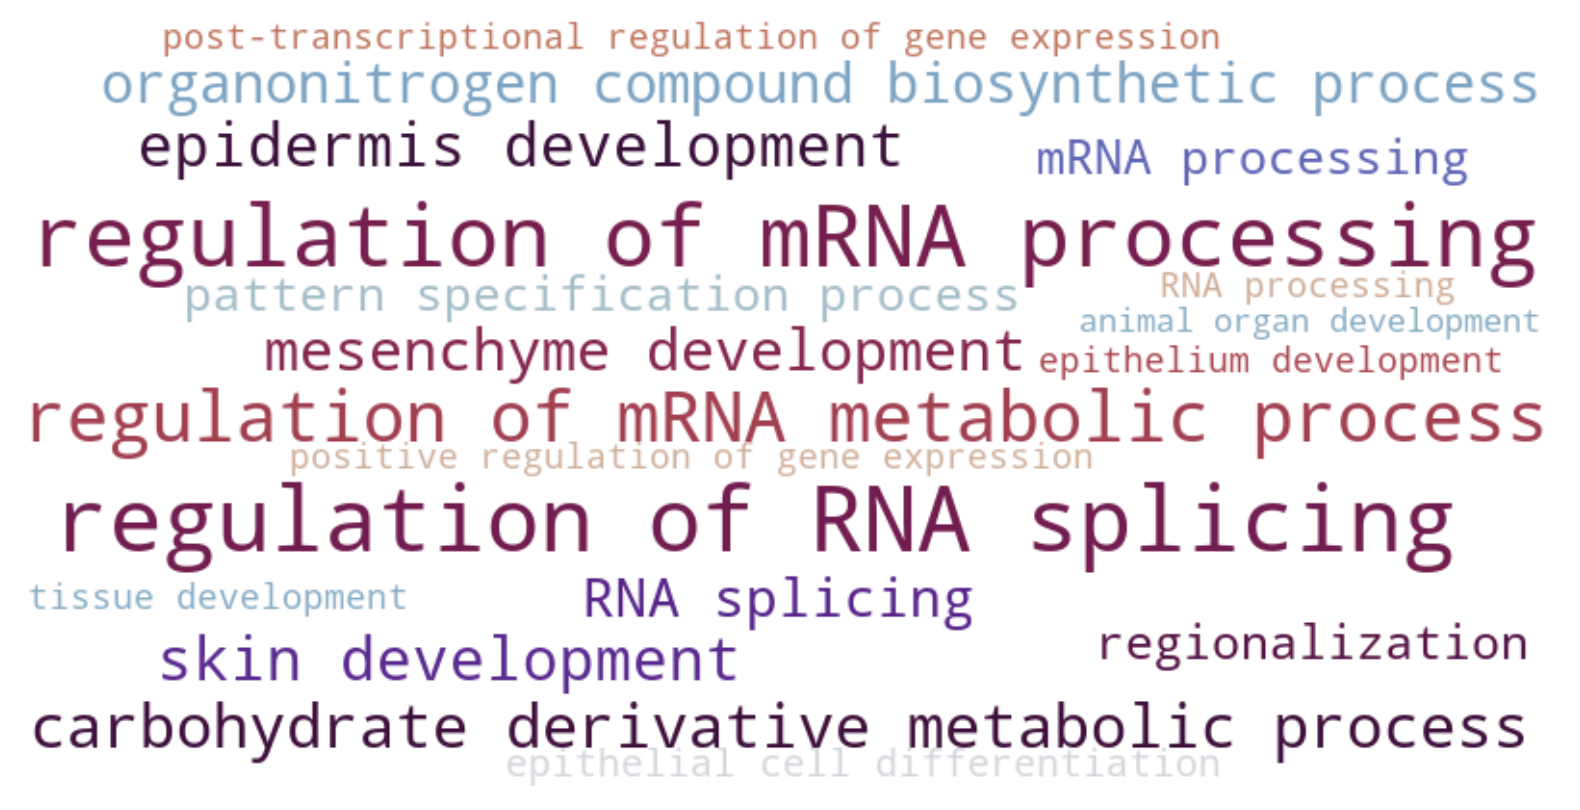

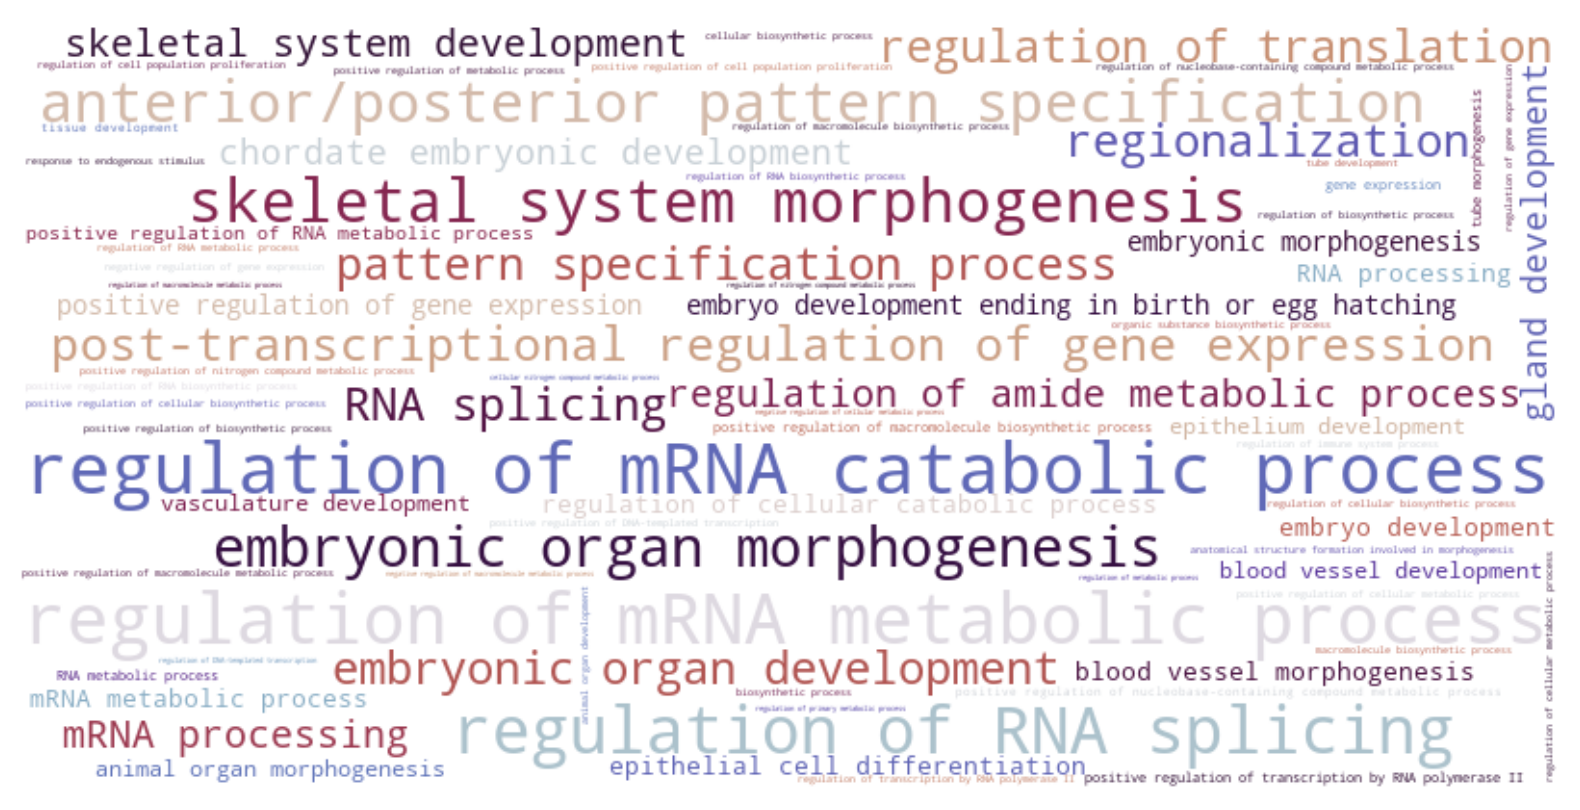

In [3]:
# means we need at least 40 proteins in a given GO annotation
count_thresh = 40

# means we need enrichment of 1.25 or greater
enrichment_thresh=1.25

# means we need a pval against FDR of 0.001 or more
pval_thresh=0.001

for mode in ['calvados', 'mpipi']:

    # Load the JSON file
    file_path = f'../../data/go_data/bio_proc_{mode}_attractive_vs_all.json'
    with open(file_path, 'r') as file:
        data = json.load(file)



    hits = []
    for entry in data['overrepresentation']['group']:
        r = entry['result']
        if type(r) == list:
            for input_data in r:
                tmp = parse_entry(input_data, count_thresh=count_thresh, enrichment_thresh=enrichment_thresh, pval_thresh=pval_thresh)
                if tmp is not None:
                    hits.append(tmp)
        elif type(r) == dict:
            tmp = parse_entry(r, count_thresh=count_thresh)
            if tmp is not None:
                hits.append(tmp)

    go_terms = {}
    for i in hits:
        go_terms[i[0]] = i[2]

    # initialize the wordcloud objetc
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap=cm.twilight)

    # Generate the word cloud from the GO terms and fold enrichment values
    wordcloud.generate_from_frequencies(go_terms)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear', cmap='PRGn')
    plt.axis('off')
    plt.savefig(f'out_figures/go_wordcloud_{mode}.pdf')
            